<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [58]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import IsolationForest

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



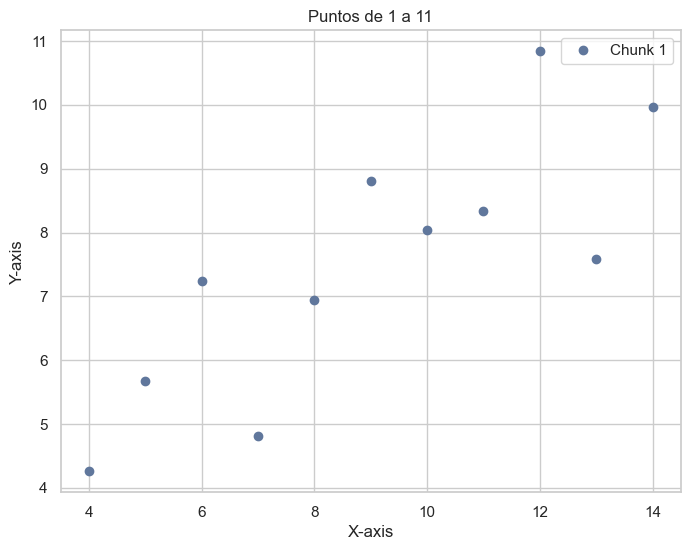

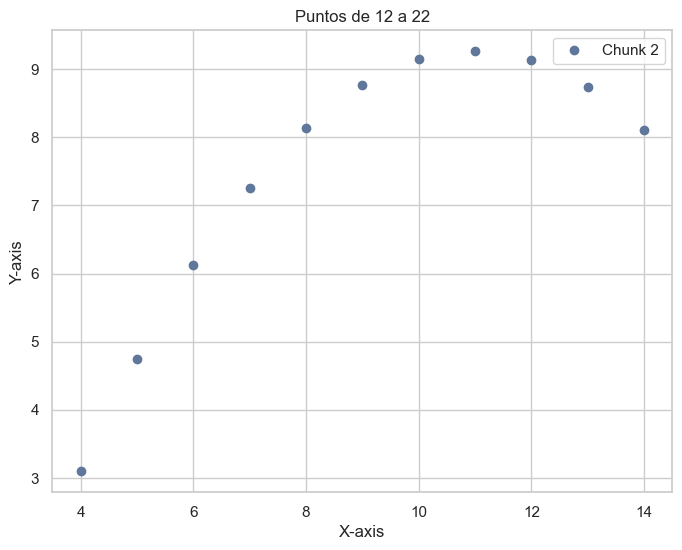

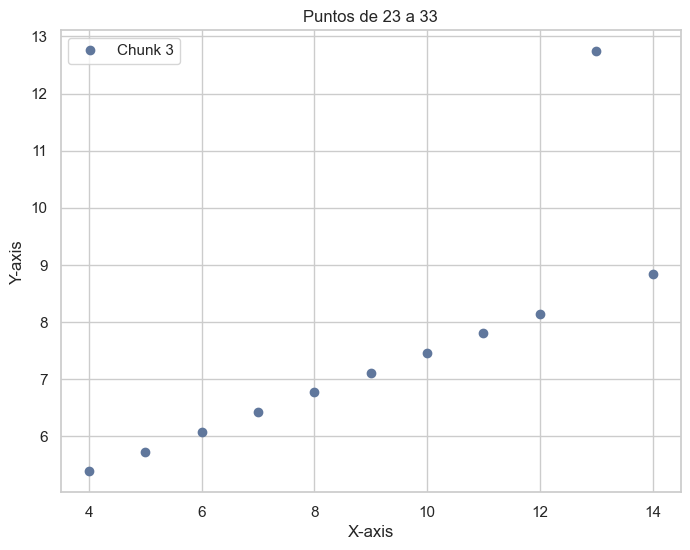

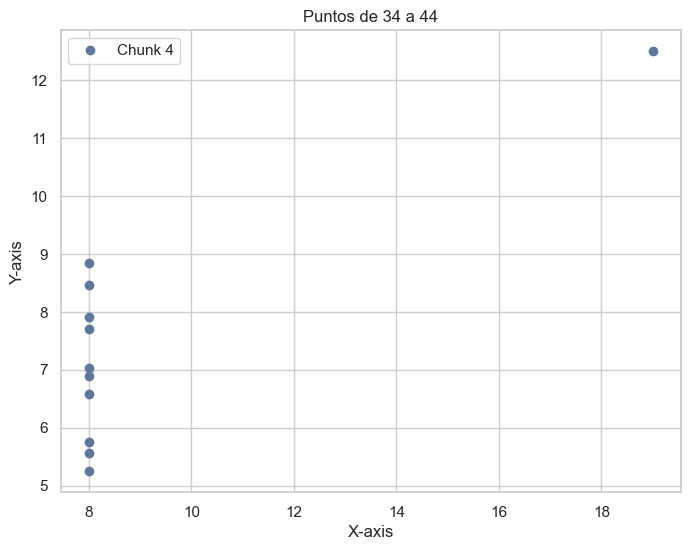

In [59]:

chunk_size = 11

for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i+chunk_size]
    
    plt.figure(figsize=(8, 6))
    
    plt.plot(chunk['x'], chunk['y'],marker = "o",linestyle = "", label=f'Chunk {i//chunk_size + 1}')
    
    plt.title(f'Puntos de {i+1} a {i+len(chunk)}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    
    plt.show()

Los cuatro gráficos son significativamente distintos entre sí. el primero son datos dispersos, el segundo tiene un comportamiento que podría ser parabolico, el tercero es un comportamiento lineal con una anomalía, mientras que el cuarto tambien es un comportamiento lineal con $x=8$ y una anomalía.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [60]:
for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i+chunk_size]
    
    print(chunk.describe())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

Son exactamente indénticos ö

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Coeficientes del modelo para el chunk 1: [[0.4699359]]
Intercepto del modelo para el chunk 1: [3.46679487]
RMSE chunk 1: 1.26
r2 chunk 1: 0.72%


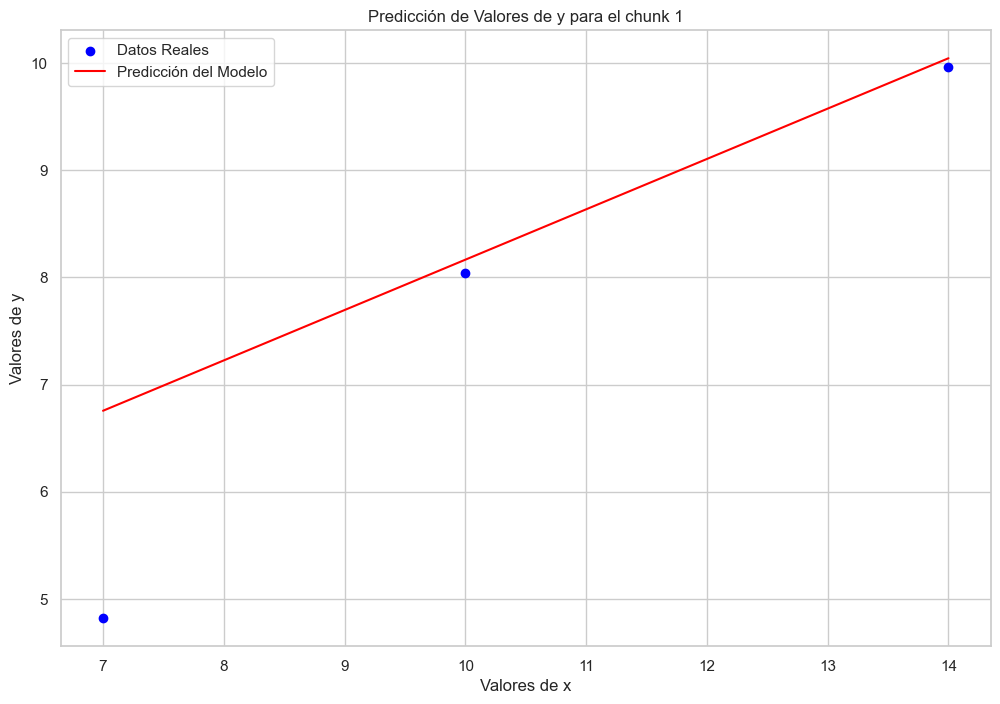

Coeficientes del modelo para el chunk 2: [[0.62673077]]
Intercepto del modelo para el chunk 2: [1.92403846]
RMSE chunk 2: 2.85
r2 chunk 2: -3.82%


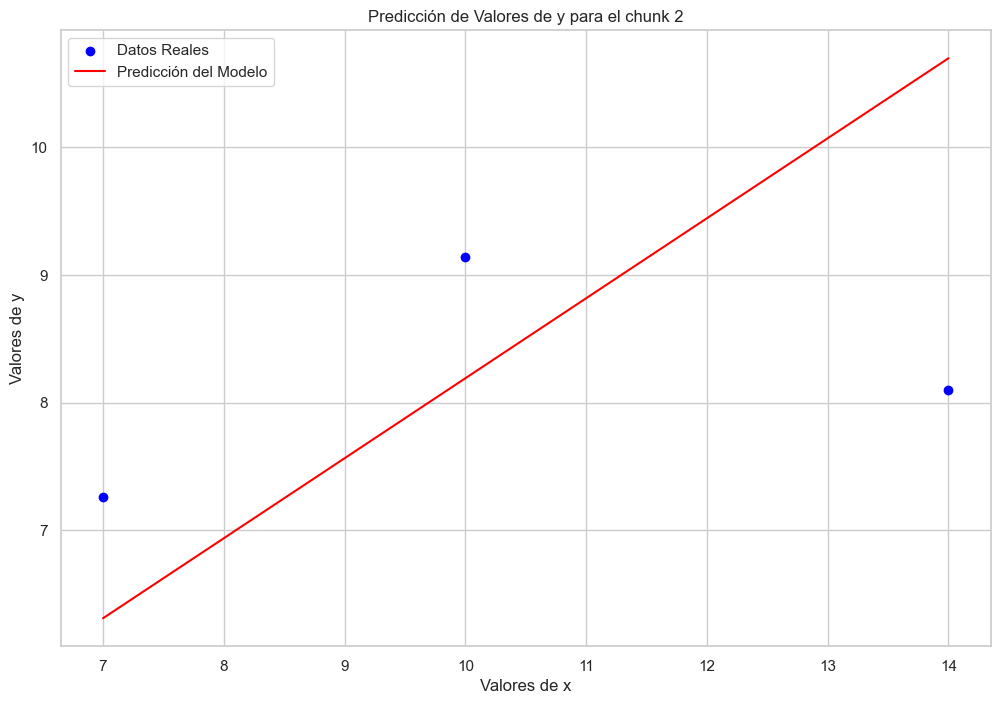

Coeficientes del modelo para el chunk 3: [[0.59025641]]
Intercepto del modelo para el chunk 3: [2.45532051]
RMSE chunk 3: 1.45
r2 chunk 3: -0.48%


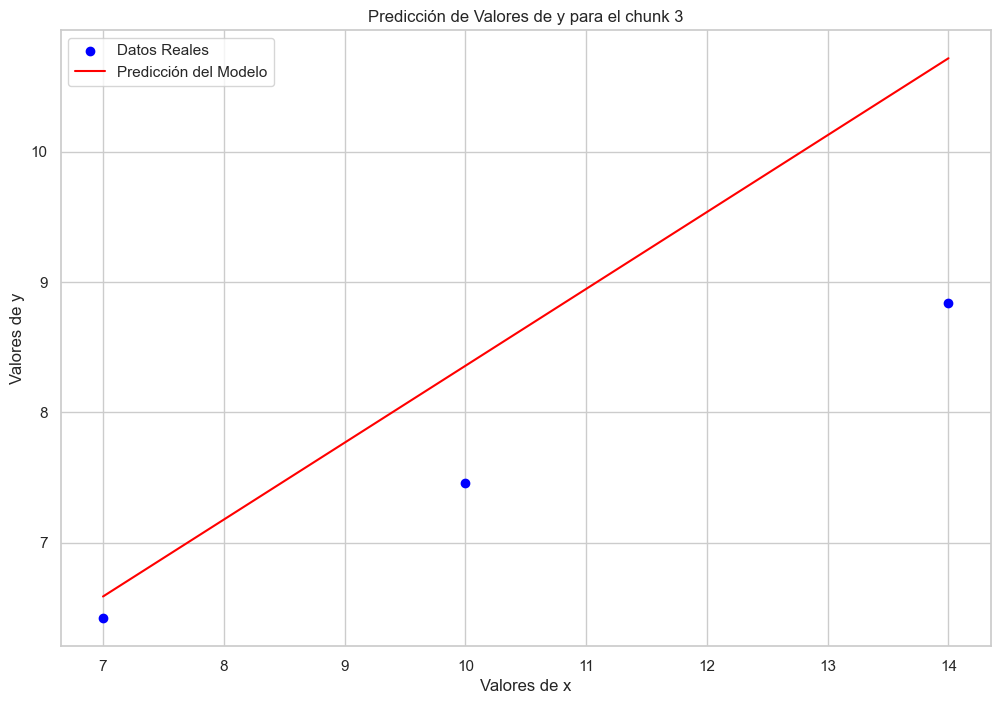

Coeficientes del modelo para el chunk 4: [[0.50675325]]
Intercepto del modelo para el chunk 4: [2.87168831]
RMSE chunk 4: 0.37
r2 chunk 4: -0.21%


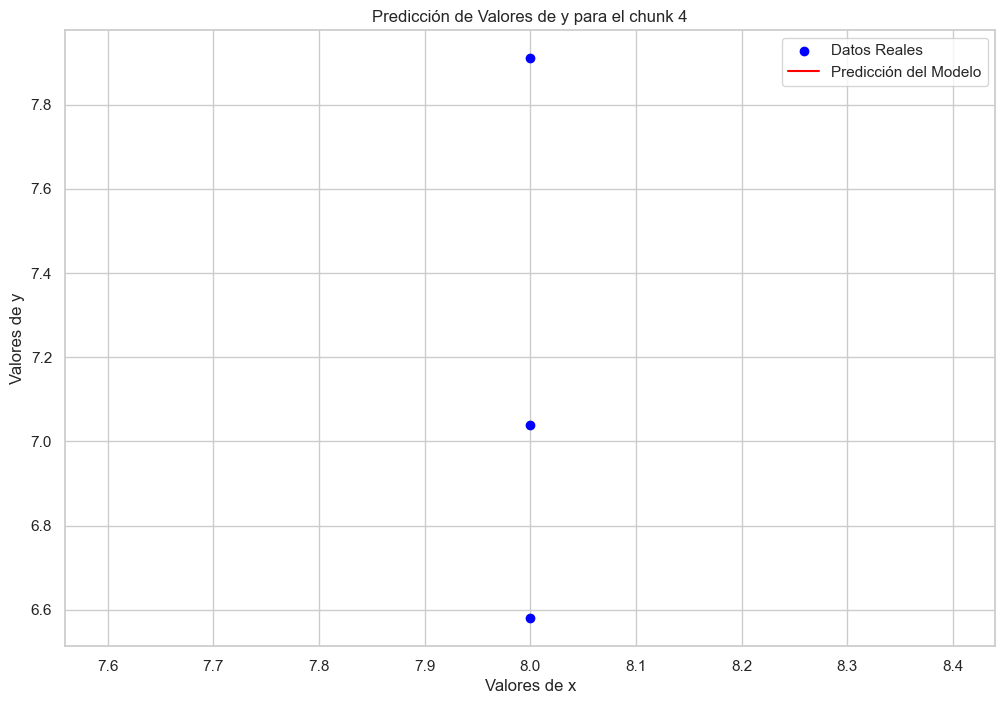

In [61]:
chunk_size = 11

for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i+chunk_size]
    

    X = chunk[['x']]
    y = chunk[['y']]
    

    # Dividir los datos en conjuntos de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train, y_train)  # Entrenar el modelo
    
    # Imprimir coeficientes del modelo
    print(f"Coeficientes del modelo para el chunk {i//chunk_size + 1}:", model.coef_)

    # Imprimir intercepto del modelo
    print(f"Intercepto del modelo para el chunk {i//chunk_size + 1}:", model.intercept_)

    # Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
    xfit = x_test.copy()

    # Predecir los valores de y utilizando el modelo
    yfit = model.predict(xfit)

        # Hacer predicciones sobre el conjunto de prueba
    y_pred = model.predict(x_test)

    rmse = mean_squared_error(y_test, y_pred)  # RMSE
    r2 = r2_score(y_test,y_pred)  # R2

    # Mostrar resultados
    print(f'RMSE chunk {i//chunk_size + 1}: {rmse:.2f}')
    print(f'r2 chunk {i//chunk_size + 1}: {r2:.2f}%')


    # Visualizar los resultados
    plt.scatter(x_test, y_test, label='Datos Reales', color='blue')  # Puntos de datos reales
    plt.plot(xfit, yfit, label='Predicción del Modelo', color='red')  # Línea de predicción
    plt.xlabel('Valores de x')  # Etiqueta del eje x
    plt.ylabel('Valores de y')  # Etiqueta del eje y
    plt.title(f'Predicción de Valores de y para el chunk {i//chunk_size + 1}')  # Título de la gráfica
    plt.legend()  # Mostrar leyenda
    plt.show()  # Mostrar la gráfica


Vemos que la aproximación lineal es en general bastante mala por el valor de $R^2$, aunque si presentan comportamientos diferentes, cosa que no sucede en el ejemplo del principio.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

C:\Users\jqnra\AppData\Local\Temp\ipykernel_23236\3488957360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_raw['anomaly'] = iso_forest.fit_predict(chunk_raw[['y']])


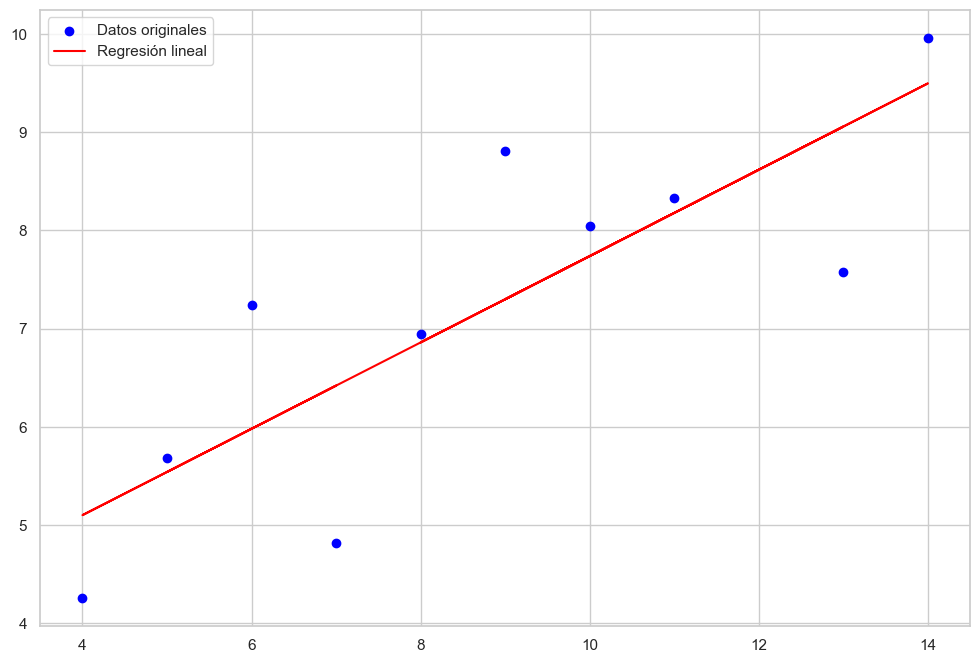

C:\Users\jqnra\AppData\Local\Temp\ipykernel_23236\3488957360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_raw['anomaly'] = iso_forest.fit_predict(chunk_raw[['y']])
c:\Users\jqnra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Pendiente (coeficiente): [[0.43947053]]
Intercepto: [3.34360639]


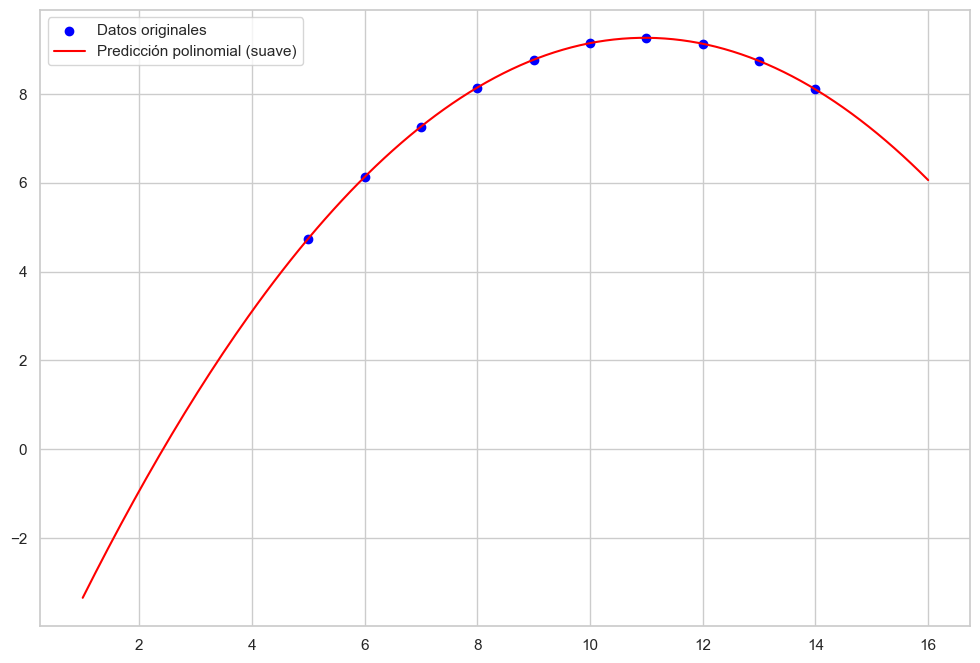

Coeficientes del polinomio: [[ 0.          2.78065909 -0.12670455]]
Intercepto: [-5.99486364]


C:\Users\jqnra\AppData\Local\Temp\ipykernel_23236\3488957360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_raw['anomaly'] = iso_forest.fit_predict(chunk_raw[['y']])


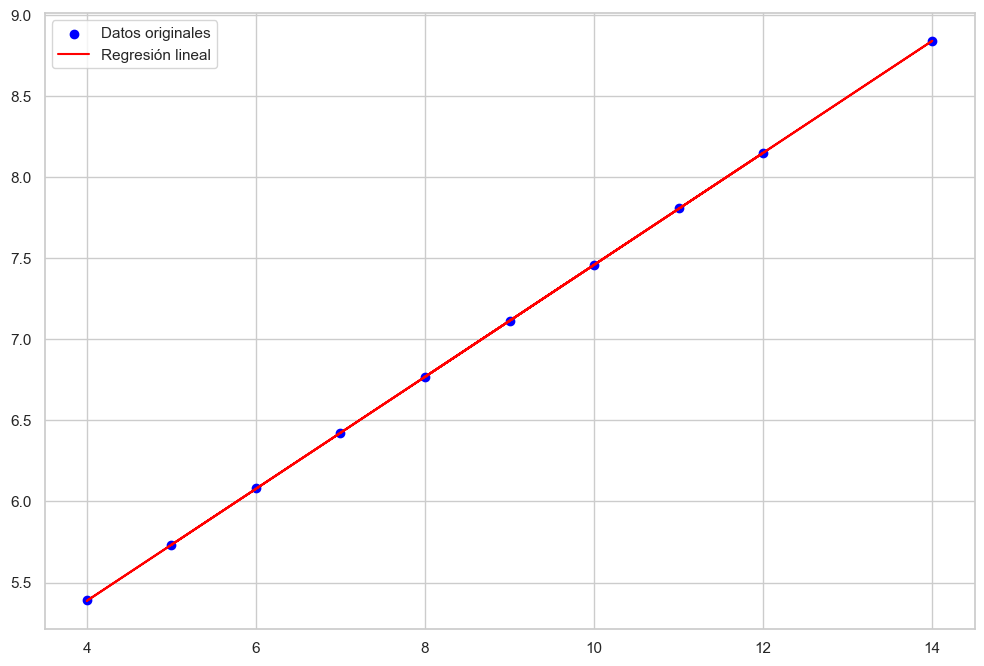

Pendiente (coeficiente): [[0.34538961]]
Intercepto: [4.00564935]


C:\Users\jqnra\AppData\Local\Temp\ipykernel_23236\3488957360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_raw['anomaly'] = iso_forest.fit_predict(chunk_raw[['y']])


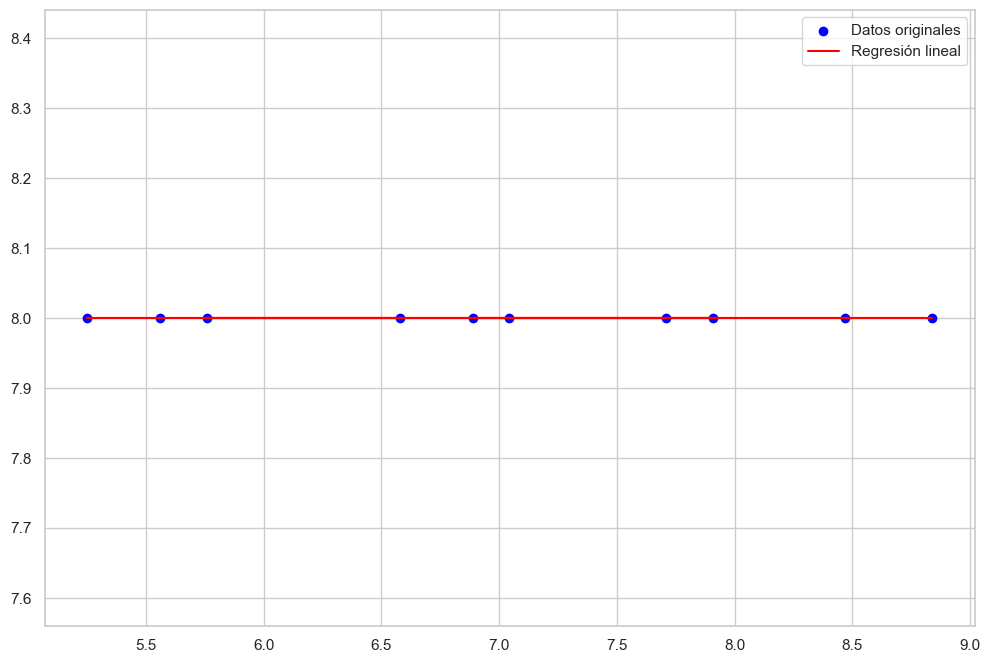

Pendiente (coeficiente): [[0.]]
Intercepto: [8.]


In [64]:
chunk_size = 11

for i in range(0, len(data), chunk_size):
    chunk_raw = data.iloc[i:i+chunk_size]
    iso_forest = IsolationForest(contamination=0.1)  # contamination = proporción de anomalías esperadas
    chunk_raw['anomaly'] = iso_forest.fit_predict(chunk_raw[['y']])
    chunk = chunk_raw[chunk_raw['anomaly'] == 1]
    if i != len(data) - chunk_size:
        X = chunk[['x']]
        y = chunk[['y']]
    else:
        X = chunk[['y']]
        y = chunk[['x']]
        

    if i == 11:
        # Transformar las características para incluir términos polinomiales
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)

        # Ajustar el modelo lineal a las características polinomiales
        model = LinearRegression()
        model.fit(X_poly, y)

        # Generar más puntos dentro del rango de los datos originales para suavizar la curva
        X_new = np.linspace(1, 16, 200).reshape(-1, 1)  # Genera 100 puntos entre 1 y 5
        X_new_poly = poly.transform(X_new)

        # Hacer predicciones con los nuevos puntos
        y_new_pred = model.predict(X_new_poly)

        # Graficar
        plt.scatter(X, y, color='blue', label='Datos originales')
        plt.plot(X_new, y_new_pred, color='red', label='Predicción polinomial (suave)')
        plt.legend()
        plt.show()

        # Mostrar coeficientes
        print(f"Coeficientes del polinomio: {model.coef_}")
        print(f"Intercepto: {model.intercept_}")
    else:
        # Crear y ajustar el modelo de regresión lineal
        model = LinearRegression()
        model.fit(X, y)

        # Hacer predicciones
        y_pred = model.predict(X)

        # Graficar
        plt.scatter(X, y, color='blue', label='Datos originales')
        plt.plot(X, y_pred, color='red', label='Regresión lineal')
        plt.legend()
        plt.show()

        # Mostrar coeficientes
        print(f"Pendiente (coeficiente): {model.coef_}")
        print(f"Intercepto: {model.intercept_}")